# Convolutional Neuronal Network with MNIST Digits database

In this project, we will use CNN to clasify digits from MNIST database.

## Preparation

Import the necessary libraries to use.

In [71]:
# Pytorch

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [72]:
# Graphing

import matplotlib.pylab as plt
import numpy as np

Let's define the function for plotting.

In [73]:
def plot_channels(W):
    n_out = W.shape[0]
    n_in = W.shape[1]
    w_min = W.min().item()
    w_max = W.max().item()

    fig, axes = plt.subplots(n_out, n_in)
    fig.subplots_adjunts(hspace=0.1)
    out_index = 0
    in_index = 0

    # plot outputs as rows, inputs as columns

    for ax in axes.flat:
        if in_index > n_in - 1:
            out_index = out_index+1
            in_index = 0

        ax.imshow(W[out_index, in_index, :, :],
                  vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        in_index = in_index+1

    plt.show()

The plot_parameters function is use to plot out the kernel parameters of each channel with multiple outputs.

In [74]:
def plot_parameters(W, number_rows=1, name="", i=0):
    W = W.data[:, i, :, :]
    n_filters = W.shape[0]
    w_min = W.min().item()
    w_max = W.max().item()

    fig, axes = plt.subplots(number_rows, n_filters // number_rows)
    fig.subplots_adjunts(hspace=0.4)

    for i, ax in enumarete(axes.flat):
        if i < n_filters:
            ax.set_xlabel("Kernel:{0}".format(i + 1))

            ax.imshow(W[i, :], vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])

    plt.subtitle(name, fontsize=10)
    plt.show()

Define the plot_activation function to plot out the activations of the Convolutional layers.

In [75]:
def plot_activations(A, number_rows=1, name="", i=0):
    A = A[0, :, :, :].detach().numpy()
    n_activations = A.shape[0]
    A_min = A.min().item()
    A_max = A.max().item()

    fig, axes = plt.subplots(number_rows, n_activations // number_rows)
    fig.subplots_adjust(hspace=0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_activations:
            ax.set_xlabel("activation:{0}".format(i + 1))

            ax.imshow(A[i, :], vmin=A_min, vmax=A_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])

    plt.show()

And, the function show_data to plot out data samples as images.

In [76]:
def show_data(data_sample):
    image = data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE)
    label = data_sample[1]
    
    plt.imshow(image, cmap='gray')
    plt.title('Label: ' + str(label))
    
    # Agregar los valores de intensidad limitados a 1 decimal en cada píxel
    for i in range(IMAGE_SIZE):
        for j in range(IMAGE_SIZE):
            intensity = round(image[i, j], 1)
            plt.text(j, i, str(intensity), color='black', fontsize=8, ha='center', va='center')

## Get Data

Transformers to resize the image and convert it to a tensor.

In [77]:
IMAGE_SIZE = 16

TR_Resize = transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))
TR_toTensor = transforms.ToTensor()

composed = transforms.Compose([TR_Resize, TR_toTensor])

Load the training and validation dataset.

In [78]:
train_data = dsets.MNIST(root='./data', train=True, transform=composed, download=True)
val_data = dsets.MNIST(root='./data', train=False, transform=composed, download=True)

Each element in the rectangular tensor corresponds to a number intensity:

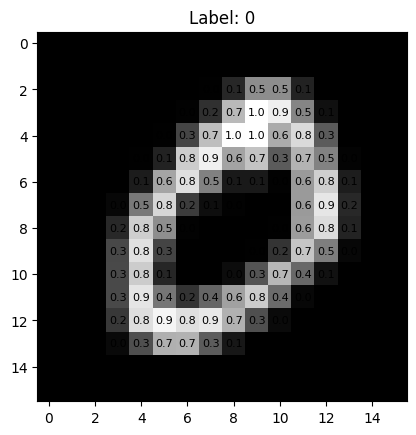

In [79]:
show_data(train_data[1])